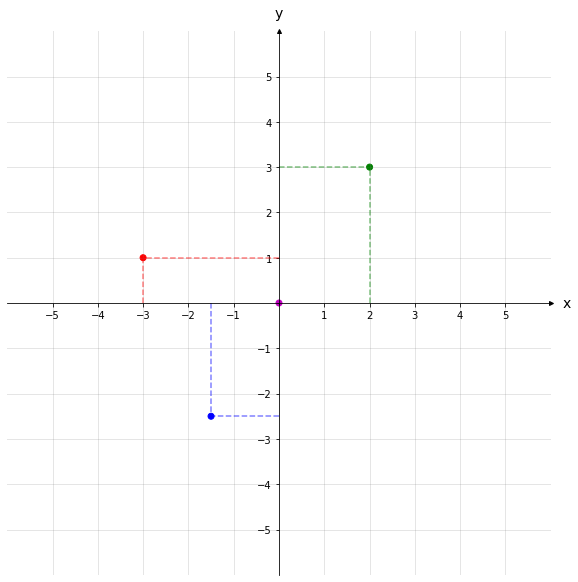

In [1]:
import numpy as np                 # v 1.19.2
import matplotlib.pyplot as plt    # v 3.3.2

# Enter x and y coordinates of points and colors
xs = [0, 2, -3, -1.5]
ys = [0, 3, 1, -2.5]
 

colors = ['m', 'g', 'r', 'b']

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys, c=colors)
 

# Draw lines connecting points to axes
for x, y, c in zip(xs, ys, colors): 
    ax.plot([x, x], [0, y], c=c, ls='--', lw=1.5, alpha=0.5)
    ax.plot([0, x], [y, y], c=c, ls='--', lw=1.5, alpha=0.5)

# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

plt.show()